<a href="https://colab.research.google.com/github/surekhagm16/MLProjects/blob/main/computervision(naive).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [ ]:
#This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
import numpy as np
index= 0
np.set_printoptions(linewidth=320)
#print the label and the image
print(f'label: {y_train[index]}')
print(f'\nImage Pixel Array:\n\n{X_train[index]}')

label: 9

Image Pixel Array:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

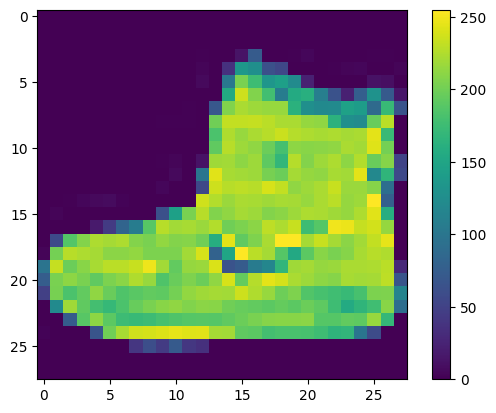

In [ ]:
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [ ]:
y_train[0]

np.uint8(9)

In [ ]:
# Normalize the training and test data sets
X_train = X_train /255.0
X_test = X_test / 255.0

In [ ]:
# Flatten the input image using flatten layer

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    layers.Input(shape=(28,28)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs=None):
    if logs['loss'] < 0.25:
      print('Losss is low hence cancelling the training....')
      self.model.stop_training = True

In [ ]:
model.fit(X_train, y_train, epochs = 100, callbacks=[myCallback()])

Epoch 1/100
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9281 - loss: 0.2033Losss is low hence cancelling the training....
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9281 - loss: 0.2033


In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 0.3444


[0.3448943495750427, 0.8805999755859375]

In [ ]:
y_pred= model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
np.argmax(y_pred[0]), y_test[0]

(np.int64(9), np.uint8(9))